# Cross-validation: Evaluating estimator performance

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets 
from sklearn import svm

In [2]:
X, y = datasets.load_iris(return_X_y = True)
X.shape, y.shape

((150, 4), (150,))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

X_train.shape, y_train.shape   

((90, 4), (90,))

In [4]:
X_test.shape, y_test.shape

((60, 4), (60,))

In [6]:
clf = svm.SVC(kernel='linear', C = 1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9666666666666667

In [7]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2])

In [12]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9666666666666667


## Computing Cross-Validation Metrics

In [16]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel = 'linear', C = 1, random_state=42)
scores = cross_val_score(clf, X, y, cv=10)
scores

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       1.        , 0.93333333, 1.        , 1.        , 1.        ])

In [18]:
print("%0.2f accuracy with a standard deviation of %0.2f" %(scores.mean(), scores.std())) 

0.97 accuracy with a standard deviation of 0.04


In [19]:
from sklearn import metrics
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
scores

array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

In [20]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits = 5, test_size=0.3, random_state=0)
cross_val_score(clf, X, y, cv=cv)

array([0.97777778, 0.97777778, 1.        , 0.95555556, 1.        ])

# K-Fold 

In [26]:
import numpy as np 
from sklearn.model_selection import KFold 
X = ['a', 'b', 'c', 'd']
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test)) # 1st iteration: train = [c d], test = [a b] 2nd iteration: train = [a b], test = [c d]

[2 3] [0 1]
[0 1] [2 3]


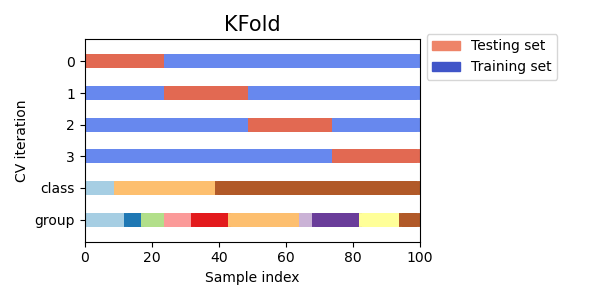

In [29]:
X = np.array([[0., 0.], [1., 1.], [-1., -1.], [2., 2.]])
y = np.array([0, 1, 0, 1])
X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]

## Repeated K-Fold 

In [37]:
import numpy as np 
from sklearn.model_selection import RepeatedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
random_state = 12883823
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
for train, test in rkf.split(X):
    print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]
[0 2] [1 3]
[1 3] [0 2]


## Leave One Out (LOO)

In [39]:
from sklearn.model_selection import LeaveOneOut

In [40]:
X = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


## Leave P Out (LPO) Cross-Validation   

In [41]:
from sklearn.model_selection import LeavePOut
X = np.ones(4)
lpo = LeavePOut(p=2)
for train, test in lpo.split(X):
    print("%s %s" % (train, test))  

[2 3] [0 1]
[1 3] [0 2]
[1 2] [0 3]
[0 3] [1 2]
[0 2] [1 3]
[0 1] [2 3]


## Random permutations cross-validation a.k.a. Shuffle & Split

In [42]:
from sklearn.model_selection import ShuffleSplit
X = np.arange(10)
ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
for train_index, test_index in ss.split(X):
    print("%s %s" % (train_index, test_index))

[9 1 6 7 3 0 5] [2 8 4]
[2 9 8 0 6 7 4] [3 5 1]
[4 5 1 0 6 9 7] [2 3 8]
[2 7 5 8 0 3 4] [6 1 9]
[4 1 0 6 8 9 3] [5 2 7]


``Note: The ShuffleSplit iterator will generate a user defined number of independent train / test dataset splits. Samples are first shuffled and then split into a pair of train and test sets.``

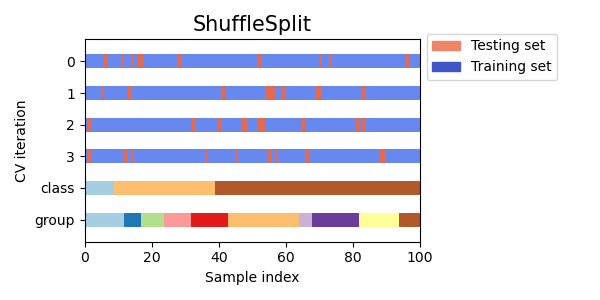

## Stratified K-Folds cross-validator

In [44]:
from sklearn.model_selection import StratifiedKFold, KFold
import numpy as np

X, y = np.ones((50, 1)), np.hstack(([0]*45, [1]*5)) # 50 samples, 45 of class 0, 5 of class 1
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
    print("train: {}| test: {}".format(
        np.bincount(y[train]), np.bincount(y[test])))

train: [30  3]| test: [15  2]
train: [30  3]| test: [15  2]
train: [30  4]| test: [15  1]


In [45]:
kf = KFold(n_splits=3)
for train, test in kf.split(X, ): 
    print("train: {}| test: {}".format(
        np.bincount(y[train]), np.bincount(y[test])))

train: [28  5]| test: [17]
train: [28  5]| test: [17]
train: [34]| test: [11  5]


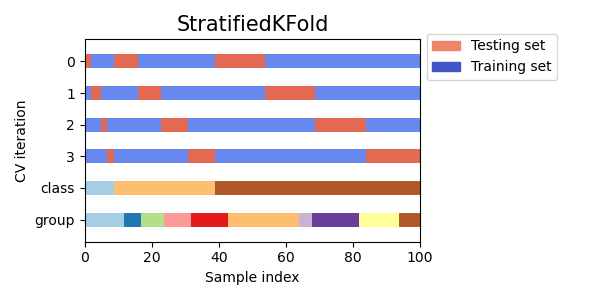

## Group KFold 

In [47]:
from sklearn.model_selection import GroupKFold
X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9, 10]    
y = ["a", "b", "b", "b", "c", "c", "c", "d", "d", "d"]  
groups = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3]
gkf = GroupKFold(n_splits=3)
for train, test in gkf.split(X, y, groups=groups):
    print("%s %s" % (train, test))

[0 1 2 3 4 5] [6 7 8 9]
[0 1 2 6 7 8 9] [3 4 5]
[3 4 5 6 7 8 9] [0 1 2]


## Stratified Group K-Folds cross-validator

In [48]:
from sklearn.model_selection import StratifiedGroupKFold
X = list(range(18))
y = [1]*6 + [0]*12
groups =[1, 2, 3, 3, 4, 4, 1, 1, 2, 2, 3, 4, 5, 5, 5, 6, 6, 6]
sgkf = StratifiedGroupKFold(n_splits=3) 
for train, test in sgkf.split(X , y, groups = groups): 
    print("%s %s" % (train, test))  

[ 0  2  3  4  5  6  7 10 11 15 16 17] [ 1  8  9 12 13 14]
[ 0  1  4  5  6  7  8  9 11 12 13 14] [ 2  3 10 15 16 17]
[ 1  2  3  8  9 10 12 13 14 15 16 17] [ 0  4  5  6  7 11]


## Leave One Group Out Cross Validation

In [49]:
from sklearn.model_selection import LeaveOneGroupOut
X = [1, 5, 10, 50, 60, 70, 80]
y = [0, 1, 1, 2, 2, 2, 2]
groups = [1, 1, 2, 2, 3, 3, 3]
logo = LeaveOneGroupOut()
for train, test in logo.split(X, y, groups=groups):
    print("%s %s" % (train, test))

[2 3 4 5 6] [0 1]
[0 1 4 5 6] [2 3]
[0 1 2 3] [4 5 6]


## Leave P Groups Out Cross-Validation

In [50]:
from sklearn.model_selection import LeavePGroupsOut 

X = np.arange(6)
y = [1, 1, 1, 2, 2, 2]
groups = [1, 1, 2, 2, 3, 3]

lpgo = LeavePGroupsOut(n_groups=2)
for train, test in lpgo.split(X, y, groups=groups):
    print("%s %s" % (train, test))

[4 5] [0 1 2 3]
[2 3] [0 1 4 5]
[0 1] [2 3 4 5]


## GroupShuffleSplit Cross Validation Techniques 

In [52]:
from sklearn.model_selection import GroupShuffleSplit

X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 0.001] 
y = ["a", "b", "b", "b", "c", "c", "c", "a"]    
groups = [1, 1, 2, 2, 3, 3, 4, 4]   
gss = GroupShuffleSplit(n_splits = 4, test_size = 0.5, random_state = 0)
for train, test in gss.split(X, y, groups=groups):
    print("%s %s" % (train, test))

[0 1 2 3] [4 5 6 7]
[2 3 6 7] [0 1 4 5]
[2 3 4 5] [0 1 6 7]
[4 5 6 7] [0 1 2 3]
